## Data import

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("data/OnlineNewsPopularity.csv", index_col=False).drop('url', axis=1)
df.columns = df.columns.str.strip()
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Test and train sets creation

In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models

In [6]:
model = LinearRegression().fit(X_train,y_train) # więcej modeli

## Predictions

In [7]:
predictions = model.predict(X_test)

## Scores

In [8]:
from sklearn.metrics import r2_score

rmse = np.sqrt(mean_squared_error(y_test, predictions)) # więcej metryk
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error (MSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")

Mean Squared Error (MSE): 10838.94171927005
R-squared (R2 Score): 0.0264285114288757


## Data analysis

Upper Bound: timedelta                                  NaN
n_tokens_title                       23.000000
n_tokens_content                   8474.000000
n_unique_tokens                     701.000000
n_non_stop_words                   1042.000000
n_non_stop_unique_tokens            650.000000
num_hrefs                           304.000000
num_self_hrefs                      116.000000
num_imgs                            128.000000
num_videos                           91.000000
average_token_length                  8.041534
num_keywords                               NaN
data_channel_is_lifestyle             1.000000
data_channel_is_entertainment         1.000000
data_channel_is_bus                   1.000000
data_channel_is_socmed                1.000000
data_channel_is_tech                  1.000000
data_channel_is_world                 1.000000
kw_min_min                          377.000000
kw_max_min                       298400.000000
kw_avg_min                        42827.857143


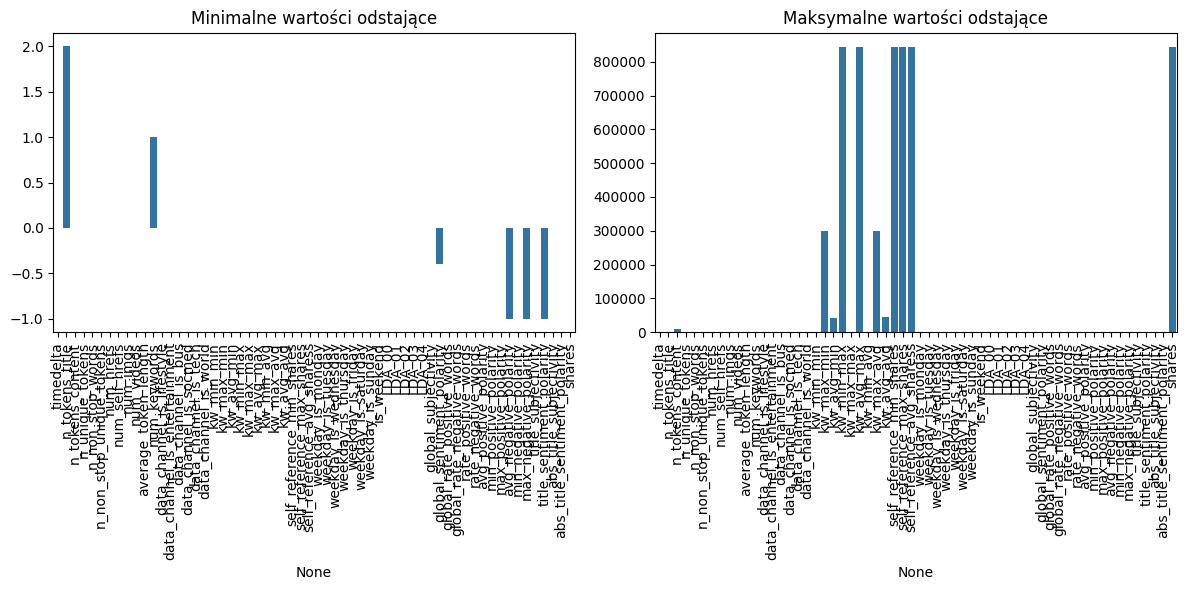

<ipython-input-9-959720edea15>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-value', y='Feature', data=feature_importance.head(20), palette='viridis')


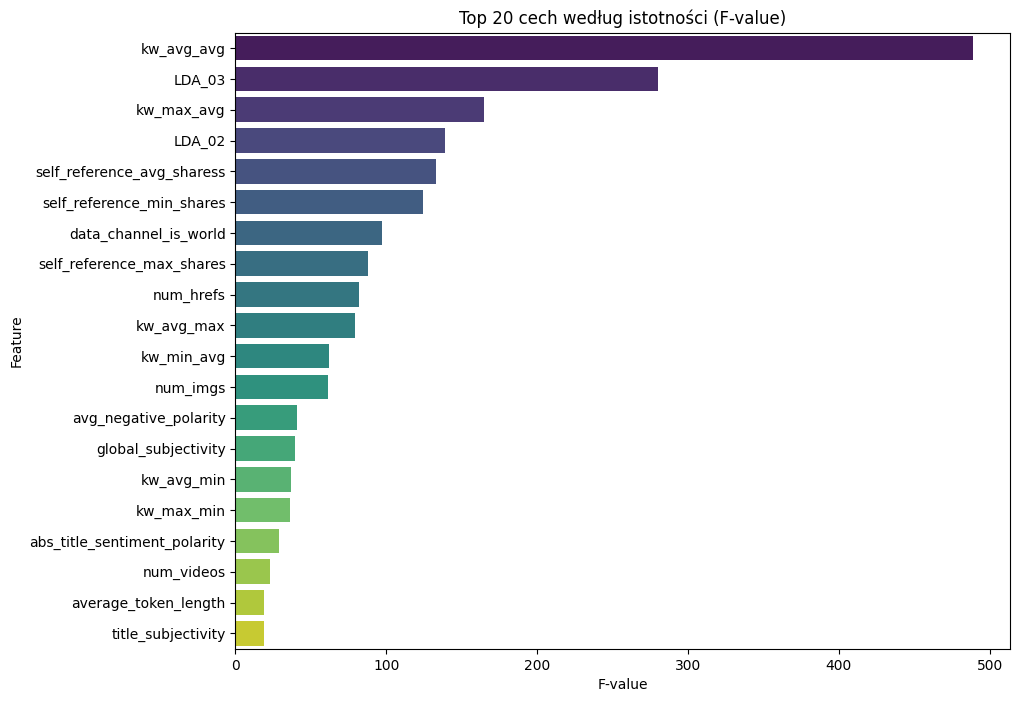

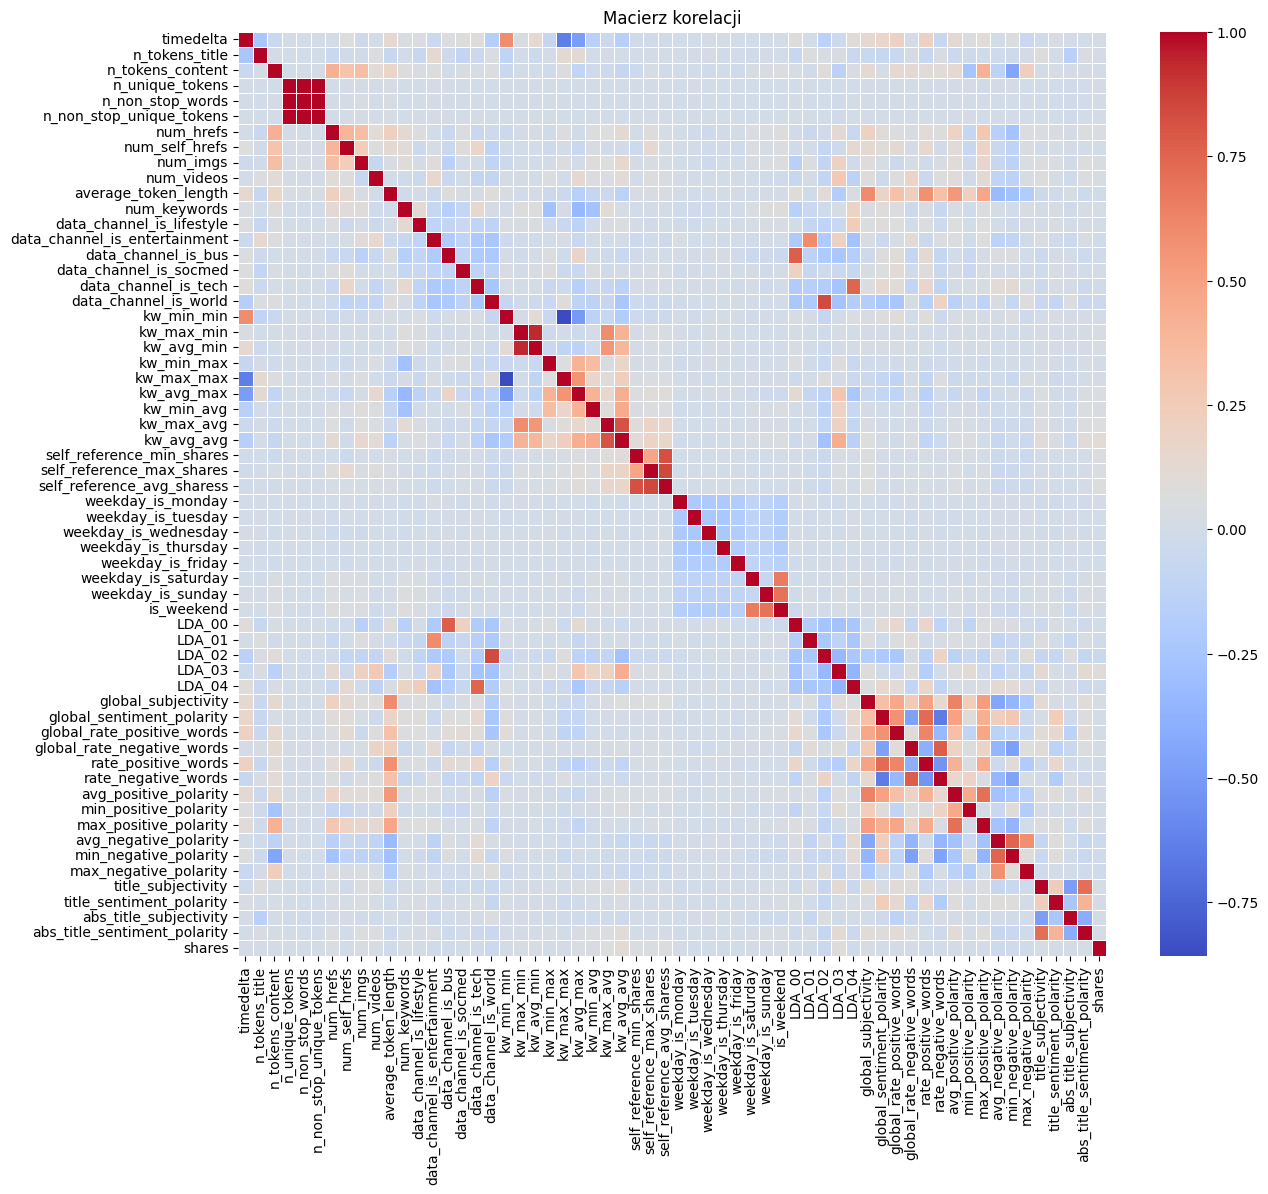

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression

def analyze_data(df):
    # Znalezienie minimalnych i maksymalnych wartości odstających
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    min_outliers = df[df < lower_bound].min()
    max_outliers = df[df > upper_bound].max()

    upper_array = df[df > upper_bound]
    print("Upper Bound:", max_outliers)
    print(upper_array.sum())

    lower_array = df[df < lower_bound]
    print("Lower Bound:", min_outliers)
    print(lower_array.sum())

    # Obliczenie istotności danych (F-test)
    X = df.drop('shares', axis=1)
    y = df['shares']
    f_values, p_values = f_regression(X, y)
    feature_importance = pd.DataFrame({'Feature': X.columns, 'F-value': f_values, 'p-value': p_values})
    feature_importance = feature_importance.sort_values(by='F-value', ascending=False)

    # Obliczenie macierzy korelacji
    correlation_matrix = df.corr()

    return min_outliers, max_outliers, feature_importance, correlation_matrix

def plot_results(min_outliers, max_outliers, feature_importance, correlation_matrix):
    # Wykres minimalnych i maksymalnych wartości odstających
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=min_outliers.index, y=min_outliers.values)
    plt.xticks(rotation=90)
    plt.title('Minimalne wartości odstające')
    plt.subplot(1, 2, 2)
    sns.barplot(x=max_outliers.index, y=max_outliers.values)
    plt.xticks(rotation=90)
    plt.title('Maksymalne wartości odstające')
    plt.tight_layout()
    plt.show()

    # Wykres istotności danych
    plt.figure(figsize=(10, 8))
    sns.barplot(x='F-value', y='Feature', data=feature_importance.head(20), palette='viridis')
    plt.title('Top 20 cech według istotności (F-value)')
    plt.xlabel('F-value')
    plt.ylabel('Feature')
    plt.show()

    # Wykres macierzy korelacji
    plt.figure(figsize=(14, 12))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
    plt.title('Macierz korelacji')
    plt.show()

# df.columns = df.columns.str.strip()

min_outliers, max_outliers, feature_importance, correlation_matrix = analyze_data(df)

# Generowanie wykresów
plot_results(min_outliers, max_outliers, feature_importance, correlation_matrix)